# Visualización del DataSet

En este notebook se muestran algunos mecanismos más utilizados para la visualización del DataSet. Power BI, Looker Studio.

## DataSet

### Descripción

ISCX NSL-KDD dataset 2009 
We apologize, this dataset is no longer available.

ISCX NSL-KDD is a data set suggested to solve some of the inherent problems of the KDD'99 data set which are mentioned in [1]. Although, this new version of the KDD data set still suffers from some of the problems discussed by McHugh and may not be a perfect representative of existing real networks, because of the lack of public data sets for network-based IDSs, we believe it still can be applied as an effective benchmark data set to help researchers compare different intrusion detection methods.

Furthermore, the number of records in the NSL-KDD train and test sets are reasonable. This advantage makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research work will be consistent and comparable.

Data files

KDDTrain+.ARFF: The full NSL-KDD train set with binary labels in ARFF format
KDDTrain+.TXT: The full NSL-KDD train set including attack-type labels and difficulty level in CSV format
KDDTrain+_20Percent.ARFF: A 20% subset of the KDDTrain+.arff file
KDDTrain+_20Percent.TXT: A 20% subset of the KDDTrain+.txt file
KDDTest+.ARFF: The full NSL-KDD test set with binary labels in ARFF format
KDDTest+.TXT: The full NSL-KDD test set including attack-type labels and difficulty level in CSV format
KDDTest-21.ARFF: A subset of the KDDTest+.arff file which does not include records with difficulty level of 21 out of 21
KDDTest-21.TXT: A subset of the KDDTest+.txt file which does not include records with difficulty level of 21 out of 21
Improvements to the KDD'99 dataset
The ISCX NSL-KDD data set has the following advantages over the original KDD data set:

It does not include redundant records in the train set, so the classifiers will not be biased towards more frequent records.
There is no duplicate records in the proposed test sets; therefore, the performance of the learners are not biased by the methods which have better detection rates on the frequent records.
The number of selected records from each difficultylevel group is inversely proportional to the percentage of records in the original KDD data set. As a result, the classification rates of distinct machine learning methods vary in a wider range, which makes it more efficient to have an accurate evaluation of different learning techniques.
The number of records in the train and test sets are reasonable, which makes it affordable to run the experiments on the complete set without the need to randomly select a small portion. Consequently, evaluation results of different research works will be consistent and comparable.
Statistical observations
One of the most important deficiencies in the KDD data set is the huge number of redundant records, which causes the learning algorithms to be biased towards the frequent records, and thus prevent them from learning unfrequent records which are usually more harmful to networks such as U2R and R2L attacks. In addition, the existence of these repeated records in the test set will cause the evaluation results to be biased by the methods which have better detection rates on the frequent records.

In addition, we analyzed the difficulty level of the records in KDD data set. Surprisingly, about 98% of the records in the train set and 86% of the records in the test set were correctly classified with all the 21 learners.

In order to perform our experiments, we randomly created three smaller subsets of the KDD train set each of which included fifty thousand records of information. Each of the learners where trained over the created train sets. We then employed the 21 learned machines (7 learners, each trained 3 times) to label the records of the entire KDD train and test sets, which provides us with 21 predicated labels for each record. Further, we annotated each record of the data set with a #successfulPrediction value, which was initialized to zero. Now, since the KDD data set provides the correct label for each record, we compared the predicated label of each record given by a specific learner with the actual label, where we incremented #successfulPrediction by one if a match was found. Through this process, we calculated the number of learners that were able to correctly label that given record. The highest value for #successfulPrediction is 21, which conveys the fact that all learners were able to correctly predict the label of that record.

[URL](https://www.unb.ca/cic/datasets/nsl.html)

## 1.- Lectura del DataSet

In [6]:
#Lectura del DataSet mediante funciones de python
with open('datasets/NSL-KDD/KDDTrain+.txt') as train_set:
    df = train_set.readlines()
df

['0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.00,0.00,0.00,0.00,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20\n',
 '0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.00,0.00,0.00,0.00,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15\n',
 '0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.00,1.00,0.00,0.00,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19\n',
 '0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.20,0.20,0.00,0.00,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21\n',
 '0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.00,0.00,0.00,0.00,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21\n',
 '0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.00,0.00,1.00,1.00,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21\n',
 '0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [7]:
#Lecutra del DataSet mediante pandas
import pandas as pd
df = pd.read_csv('datasets/NSL-KDD/KDDTrain+.txt')
df


,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.18,2,2.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,150,25,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,19,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [8]:
# Mostrar los ficheros en el directorio del DataSet
import os
os.listdir('datasets/NSL-KDD/')

['KDDTest+.arff',
 'KDDTrain+.arff',
 'KDDTest-21.arff',
 'KDDTrain+_20Percent.arff',
 'KDDTrain+.txt',
 'index.html',
 'KDDTest+.txt',
 'KDDTrain+_20Percent.txt',
 'KDDTest-21.txt',
 'KDDTrain1.jpg',
 'KDDTrain+.arff~',
 'KDDTest1.jpg']

An [ARFF](https://ml.cms.waikato.ac.nz/weka/arff.html) (Attribute-Relation File Format) file is an ASCII text file that describes a list of instances sharing a set of attributes. ARFF files were developed by the Machine Learning Project at the Department of Computer Science of The University of Waikato for use with the Weka machine learning software. This document descibes the version of ARFF used with Weka versions 3.2 to 3.3; this is an extension of the ARFF format as described in the data mining book written by Ian H. Witten and Eibe Frank (the new additions are string attributes, date attributes, and sparse instances).

This explanation was cobbled together by Gordon Paynter (gordon.paynter at ucr.edu) from the Weka 2.1 ARFF description, email from Len Trigg (lenbok at myrealbox.com) and Eibe Frank (eibe at cs.waikato.ac.nz), and some datasets. It has been edited by Richard Kirkby (rkirkby at cs.waikato.ac.nz). Contact Len if you're interested in seeing the ARFF 3 proposal.



In [9]:
# Instalar un nuevo paquete en el kernel de notebook

import sys
!{sys.executable} -m pip install liac-arff

In [10]:
#Lectura del DataSet que se encuentra en formato ARFF
import arff
with open('datasets/NSL-KDD/KDDTrain+.arff', 'r') as train_set:
    df = arff.load(train_set)
df.keys()

dict_keys(['description', 'relation', 'attributes', 'data'])

In [11]:
df['data']

[[0.0,
  'tcp',
  'ftp_data',
  'SF',
  491.0,
  0.0,
  '0',
  0.0,
  0.0,
  0.0,
  0.0,
  '0',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  '0',
  '0',
  2.0,
  2.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  0.0,
  0.0,
  150.0,
  25.0,
  0.17,
  0.03,
  0.17,
  0.0,
  0.0,
  0.0,
  0.05,
  0.0,
  'normal'],
 [0.0,
  'udp',
  'other',
  'SF',
  146.0,
  0.0,
  '0',
  0.0,
  0.0,
  0.0,
  0.0,
  '0',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  '0',
  '0',
  13.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.08,
  0.15,
  0.0,
  255.0,
  1.0,
  0.0,
  0.6,
  0.88,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  'normal'],
 [0.0,
  'tcp',
  'private',
  'S0',
  0.0,
  0.0,
  '0',
  0.0,
  0.0,
  0.0,
  0.0,
  '0',
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  '0',
  '0',
  123.0,
  6.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.05,
  0.07,
  0.0,
  255.0,
  26.0,
  0.1,
  0.05,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  'anomaly'],
 [0.0,
  'tcp',
  'http',
  'SF',
  232.0,
  815

In [12]:
df['attributes']

[('duration', 'REAL'),
 ('protocol_type', ['tcp', 'udp', 'icmp']),
 ('service',
  ['aol',
   'auth',
   'bgp',
   'courier',
   'csnet_ns',
   'ctf',
   'daytime',
   'discard',
   'domain',
   'domain_u',
   'echo',
   'eco_i',
   'ecr_i',
   'efs',
   'exec',
   'finger',
   'ftp',
   'ftp_data',
   'gopher',
   'harvest',
   'hostnames',
   'http',
   'http_2784',
   'http_443',
   'http_8001',
   'imap4',
   'IRC',
   'iso_tsap',
   'klogin',
   'kshell',
   'ldap',
   'link',
   'login',
   'mtp',
   'name',
   'netbios_dgm',
   'netbios_ns',
   'netbios_ssn',
   'netstat',
   'nnsp',
   'nntp',
   'ntp_u',
   'other',
   'pm_dump',
   'pop_2',
   'pop_3',
   'printer',
   'private',
   'red_i',
   'remote_job',
   'rje',
   'shell',
   'smtp',
   'sql_net',
   'ssh',
   'sunrpc',
   'supdup',
   'systat',
   'telnet',
   'tftp_u',
   'tim_i',
   'time',
   'urh_i',
   'urp_i',
   'uucp',
   'uucp_path',
   'vmnet',
   'whois',
   'X11',
   'Z39_50']),
 ('flag',
  ['OTH',
   'REJ'

In [13]:
#Parsear los atributos y obtener unicamente los nombres
atributos = [attr[0] for attr in df["attributes"]]
atributos

['duration',
 'protocol_type',
 'service',
 'flag',
 'src_bytes',
 'dst_bytes',
 'land',
 'wrong_fragment',
 'urgent',
 'hot',
 'num_failed_logins',
 'logged_in',
 'num_compromised',
 'root_shell',
 'su_attempted',
 'num_root',
 'num_file_creations',
 'num_shells',
 'num_access_files',
 'num_outbound_cmds',
 'is_host_login',
 'is_guest_login',
 'count',
 'srv_count',
 'serror_rate',
 'srv_serror_rate',
 'rerror_rate',
 'srv_rerror_rate',
 'same_srv_rate',
 'diff_srv_rate',
 'srv_diff_host_rate',
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'dst_host_rerror_rate',
 'dst_host_srv_rerror_rate',
 'class']

In [14]:
#Leer el dataframe con pandas y facilitar su manipulacion
df = pd.DataFrame(df['data'], columns=atributos)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,184.0,25.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,144.0,8.0,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


Practica: Que cargue archivos arff y que muestre el dataframe

Llegando a este punto lo ideal es construir una funcion que permita leer el Datset de manera mas limpio.Este tipo de ptracticas son de gran utilidad para que el cosdigo en Jupyter Notebook sea mas modular y pueda reutilizarse de manera mas sencilla para futuros ejercicios.

In [15]:
def load_kdd_dataset(data_path):
    """Lectura del dataset NSL-KDD"""
    with open(data_path, 'r') as train_set:
        dataset = arff.load(train_set)
        attributes = [attr[0] for attr in dataset["attributes"]]
        return pd.DataFrame(dataset['data'], columns=attributes)


In [16]:
load_kdd_dataset('datasets/NSL-KDD/KDDTrain+.arff')

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,184.0,25.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,144.0,8.0,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


### 2.-Funciones basicas de visualizacion del Dataset 

* El proceso de visualizacion siempre debe realizarse sobre el training set y apartarlo del test set. Esto evita que el modelo genere intuiciones del test set que pueda incorporar en el modelo.
* Una buena practica es crear una copia del training set y jugar con ella. De esta manera, si se realizan transformaciones que dañen el training set, el original no se ve afectado.

In [17]:
#Lectura y copia del DataSet
df_orig = load_kdd_dataset('datasets/NSL-KDD/KDDTrain+.arff')
df = df_orig.copy()

In [18]:
#Mostrar las primeras filas del DataSet
df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0.0,tcp,private,REJ,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,121.0,19.0,0.0,0.0,1.0,1.0,0.16,0.06,0.00,255.0,19.0,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,166.0,9.0,1.0,1.0,0.0,0.0,0.05,0.06,0.00,255.0,9.0,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,117.0,16.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,15.0,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0.0,tcp,remote_job,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,270.0,23.0,1.0,1.0,0.0,0.0,0.09,0.05,0.00,255.0,23.0,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,133.0,8.0,1.0,1.0,0.0,0.0,0.06,0.06,0.00,255.0,13.0,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [19]:
# Mostrar informacion basica del DataSet
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     125973 non-null  float64
 1   protocol_type                125973 non-null  object 
 2   service                      125973 non-null  object 
 3   flag                         125973 non-null  object 
 4   src_bytes                    125973 non-null  float64
 5   dst_bytes                    125973 non-null  float64
 6   land                         125973 non-null  object 
 7   wrong_fragment               125973 non-null  float64
 8   urgent                       125973 non-null  float64
 9   hot                          125973 non-null  float64
 10  num_failed_logins            125973 non-null  float64
 11  logged_in                    125973 non-null  object 
 12  num_compromised              125973 non-null  float64
 13 

In [20]:
#Mostrar la informacion estadistica sobre el DataSet
df.describe()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.0,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.022687,0.000111,0.204409,0.001222,0.279250,0.001342,0.001103,0.302192,0.012669,0.000413,0.004096,0.0,84.107555,27.737888,0.284485,0.282485,0.119958,0.121183,0.660928,0.063053,0.097322,182.148945,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240
std,2604.51531,5.870331e+06,4.021269e+06,0.253530,0.014366,2.149968,0.045239,23.942042,0.036603,0.045154,24.399618,0.483935,0.022181,0.099370,0.0,114.508607,72.635840,0.446456,0.447022,0.320436,0.323647,0.439623,0.180314,0.259830,99.206213,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,82.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,14.000000,8.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,255.000000,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,143.000000,18.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.060000,0.000000,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42908.00000,1.379964e+09,1.309937e+09,3.000000,3.000000,77.000000,5.000000,7479.000000,1.000000,2.000000,7468.000000,43.000000,2.000000,9.000000,0.0,511.000000,511.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
#Mostrar los valores unicos que tiene un atributo determinado
df['protocol_type'].value_counts()

protocol_type
tcp     102689
udp      14993
icmp      8291
Name: count, dtype: int64

In [22]:
#Tarea: Levantar servidor de correos


In [23]:
df['class'].value_counts()

class
normal     67343
anomaly    58630
Name: count, dtype: int64

<Axes: >

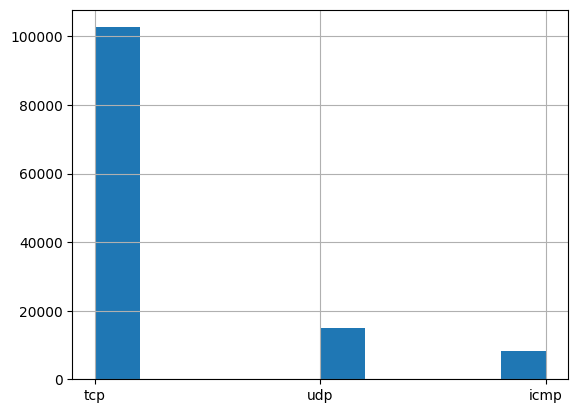

In [24]:
# Mostrar los valores de las caracteristicas como un histograma
%matplotlib inline
import matplotlib.pyplot as plt

df['protocol_type'].hist()

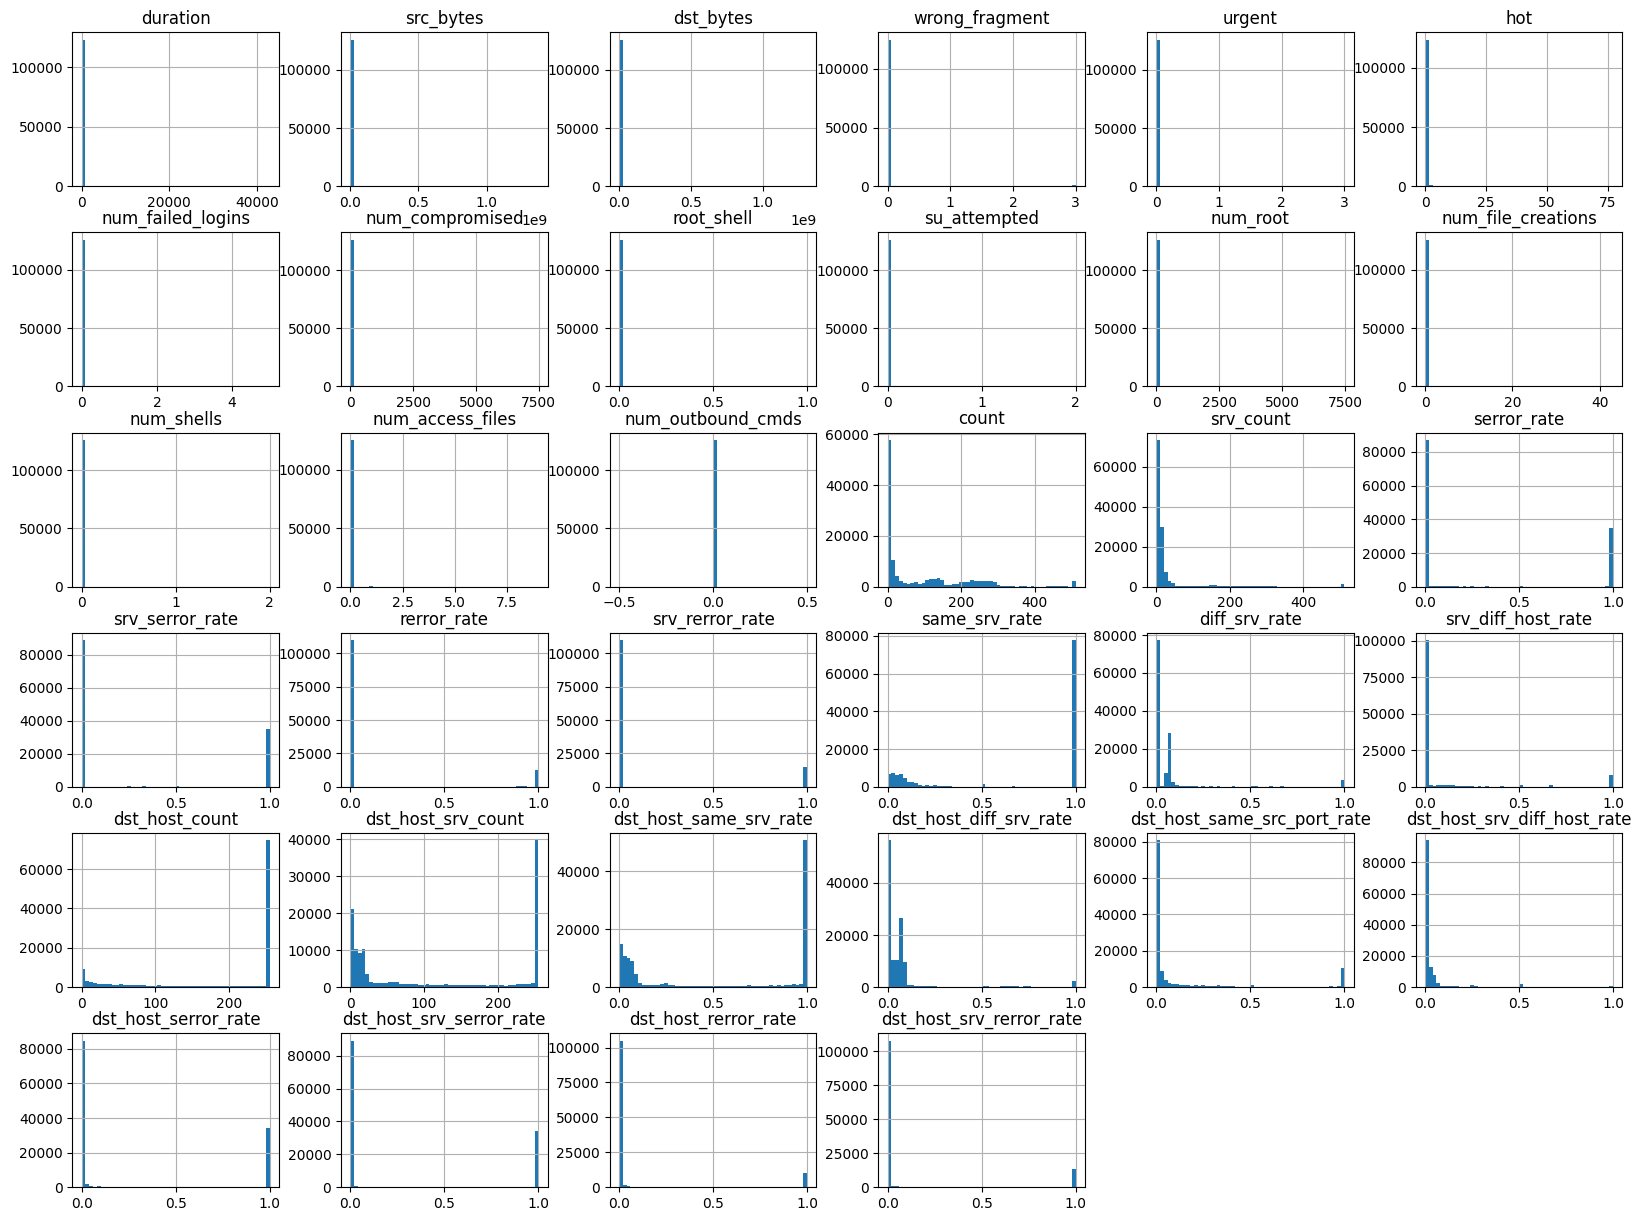

In [25]:
#Representacion grafica de los atributos
df.hist(bins=50, figsize=(20,15))
plt.show()

### 3.- Funciones avanzadas de visualización de los datos

#### Buscando correlaciones.

* Se puede calcular el coeficiente de correlacion estándar para ver la correlación entre cada uno de los atributos.

* El coeficiente de correlación sólo mide **correlaciones lineales**, esto quiere decir que si "x" va hacia arriba, mediría si "y" va hacia arriba o hacia abajo.

* Hay que intentar buscar correlaciones sobre todo con el atributo objetivo(el que se quiere predecir), en este caso, "class".

In [26]:
# El atributo "class" del Dataset tiene valores categóricos
df["class"]

0          normal
1          normal
2         anomaly
3          normal
4          normal
           ...   
125968    anomaly
125969     normal
125970     normal
125971    anomaly
125972     normal
Name: class, Length: 125973, dtype: object

In [27]:
#Transformar los valores del atributo "class" a valores numericos
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
df['class'] = labelEncoder.fit_transform(df['class'])
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0.0,tcp,ftp_data,SF,491.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150.0,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0.0,udp,other,SF,146.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,13.0,1.0,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255.0,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,123.0,6.0,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255.0,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0.0,tcp,http,SF,232.0,8153.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,5.0,5.0,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30.0,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0.0,tcp,http,SF,199.0,420.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,30.0,32.0,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255.0,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0.0,tcp,private,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,184.0,25.0,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255.0,25.0,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,0
125969,8.0,udp,private,SF,105.0,145.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,244.0,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,1
125970,0.0,tcp,smtp,SF,2231.0,384.0,0,0.0,0.0,0.0,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1.0,1.0,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255.0,30.0,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,1
125971,0.0,tcp,klogin,S0,0.0,0.0,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,144.0,8.0,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255.0,8.0,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0


In [28]:
#Mostrar la matriz de correlacion entre los atributos del DataSet
import numpy as np
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix['class'].sort_values(ascending=False))

class                          1.000000
same_srv_rate                  0.751913
dst_host_srv_count             0.722535
dst_host_same_srv_rate         0.693803
srv_diff_host_rate             0.119377
num_access_files               0.036701
su_attempted                   0.022448
num_file_creations             0.021271
root_shell                     0.020285
hot                            0.013083
num_root                       0.011452
num_compromised                0.010198
num_shells                     0.009472
num_failed_logins              0.003755
urgent                         0.002787
srv_count                     -0.000771
dst_bytes                     -0.004118
src_bytes                     -0.005921
duration                      -0.048785
dst_host_srv_diff_host_rate   -0.062332
dst_host_same_src_port_rate   -0.092444
wrong_fragment                -0.095905
diff_srv_rate                 -0.203660
dst_host_diff_srv_rate        -0.242898
dst_host_rerror_rate          -0.252563


In [29]:
#Mostrar las correlaciones lineales entre todos los atributos del DataSet
numeric_df.corr()

,duration,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
duration,1.000000,0.070737,0.034878,-0.009866,0.003830,0.000705,0.009528,0.042679,0.052791,0.087183,0.045519,0.099116,-0.001593,0.070420,NaN,-0.079042,-0.039470,-0.069873,-0.069510,0.200682,0.199961,0.074681,-0.013738,-0.040158,0.050570,-0.109776,-0.116005,0.254195,0.228737,-0.026669,-0.064948,-0.064361,0.173815,0.199024,-0.048785
src_bytes,0.070737,1.000000,0.000204,-0.000693,-0.000059,0.000295,-0.000208,-0.000086,-0.000272,-0.000186,-0.000093,-0.000179,-0.000134,-0.000309,NaN,-0.005152,-0.002792,-0.003228,-0.003438,0.013782,0.013975,0.003899,-0.000432,-0.002608,-0.005791,-0.006861,-0.006572,0.000900,0.000431,-0.001655,-0.004503,-0.003397,-0.001468,0.012449,-0.005921
dst_bytes,0.034878,0.000204,1.000000,-0.000440,0.000248,-0.000344,0.000504,0.001233,0.001069,0.001133,0.001229,0.000089,-0.000083,0.000339,NaN,-0.003543,-0.001754,-0.003059,-0.003038,0.011176,0.011052,0.003788,-0.001703,-0.001674,0.002528,-0.004224,-0.004424,0.011031,0.011747,-0.001281,-0.003024,-0.002944,0.011729,0.011223,-0.004118
wrong_fragment,-0.009866,-0.000693,-0.000440,1.000000,-0.000692,-0.008508,-0.002418,-0.001044,-0.003280,-0.002187,-0.001108,-0.002343,-0.001665,-0.003689,NaN,-0.020819,0.024457,-0.043316,-0.056549,-0.033052,-0.033507,0.054759,-0.026638,-0.026247,0.041056,-0.045240,-0.048733,0.059797,0.037177,-0.016252,-0.051917,-0.055917,0.028890,-0.033682,-0.095905
urgent,0.003830,-0.000059,0.000248,-0.000692,1.000000,0.000293,0.097507,0.033329,0.075199,0.097710,0.032470,0.024918,-0.000144,0.010803,NaN,-0.005615,-0.002848,-0.004929,-0.004889,-0.002896,-0.002897,0.005967,-0.002705,-0.002898,-0.006941,-0.007897,-0.004489,0.006840,0.002741,0.005176,-0.004749,-0.004834,-0.002999,-0.002912,0.002787
hot,0.000705,0.000295,-0.000344,-0.008508,0.000293,1.000000,0.003715,0.002014,0.015379,0.000130,0.001510,0.028716,0.004723,-0.001987,NaN,-0.068697,-0.034575,-0.059083,-0.058713,-0.032382,-0.031436,0.069365,-0.016212,-0.026781,-0.012249,-0.051864,-0.036293,-0.012293,-0.034536,-0.024715,-0.058222,-0.058214,-0.030555,-0.031670,0.013083
num_failed_logins,0.009528,-0.000208,0.000504,-0.002418,0.097507,0.003715,1.000000,0.019085,0.032567,0.073175,0.018112,0.021774,-0.000503,0.000652,NaN,-0.019544,-0.009880,-0.015254,-0.015899,0.022193,0.021870,0.019477,-0.004438,-0.010122,-0.025476,-0.023053,-0.001576,-0.001945,-0.005526,0.003302,-0.011648,-0.012299,0.018660,0.017359,0.003755
num_compromised,0.042679,-0.000086,0.001233,-0.001044,0.033329,0.002014,0.019085,1.000000,0.224872,0.362702,0.998833,0.015976,0.001338,0.299631,NaN,-0.008434,-0.004279,-0.005297,-0.005278,-0.003682,-0.003642,0.008944,-0.004035,-0.004227,-0.010928,-0.010321,-0.004995,0.002981,-0.002045,0.004252,-0.004377,-0.004898,-0.003647,-0.003219,0.010198
root_shell,0.052791,-0.000272,0.001069,-0.003280,0.075199,0.015379,0.032567,0.224872,1.000000,0.609083,0.243349,0.064919,0.116648,0.365152,NaN,-0.025630,-0.011892,-0.018220,-0.017796,-0.008983,-0.009368,0.027652,-0.009810,-0.012126,-0.029885,-0.006491,0.007608,-0.005141,0.001568,0.013391,-0.017408,-0.015744,-0.009107,-0.009742,0.020285
su_attempted,0.087183,-0.000186,0.001133,-0.002187,0.097710,0.000130,0.073175,0.362702,0.609083,1.000000,0.391038,0.044407,0.007471,0.565131,NaN,-0.017729,-0.008990,-0.007302,-0.006790,-0.005856,-0.006434,0.018448,-0.006595,-0.009153,-0.013014,-0.021037,-0.015606,0.003834,-0.005982,0.009475,-0.005731,-0.004161,-0.004873,-0.005241,0.022448


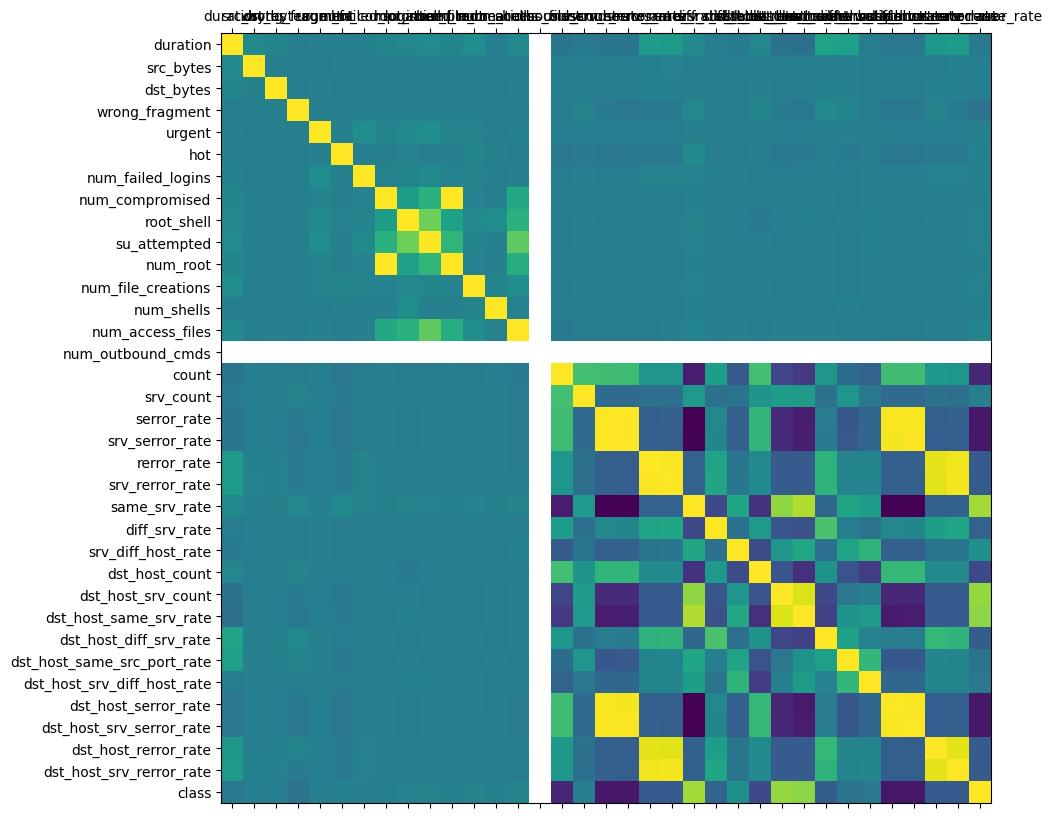

In [30]:
#Representacion grafica de la matriz de correlacion (Matriz de confusión)
corr = numeric_df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
ax.matshow(corr)
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns);

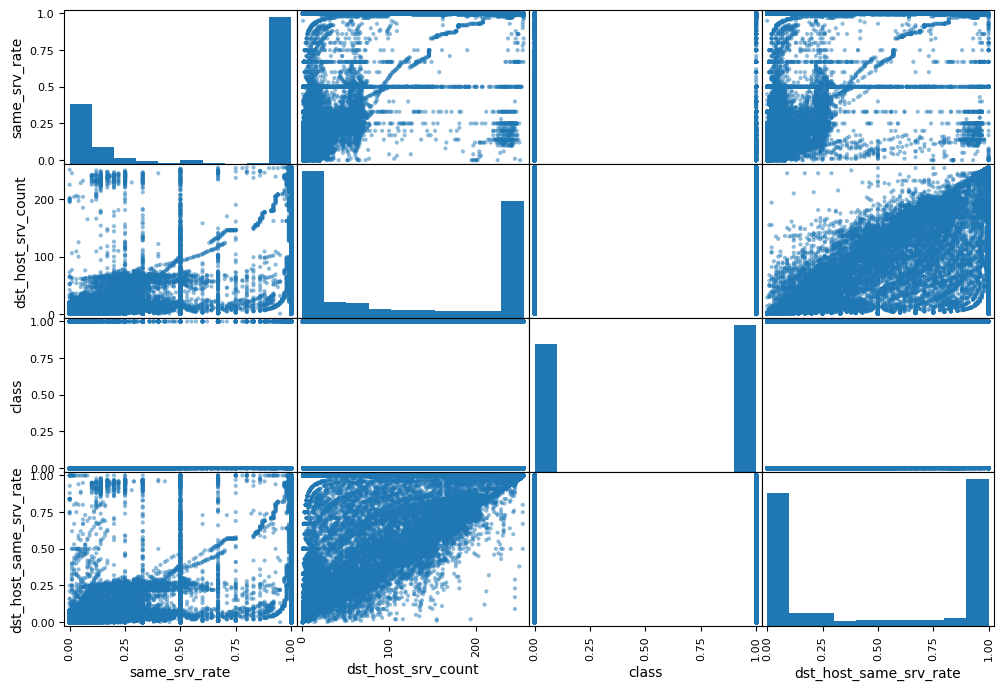

In [33]:
# Representacion grfica de las correlaciones
from pandas.plotting import scatter_matrix
attributes = ["same_srv_rate", "dst_host_srv_count", "class", "dst_host_same_srv_rate"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()